# China vs USA: AI War
***
**Felipe Loque - 11/20/2019**

Right now there is a trade war between China and United States. An economic conflict between the world’s two largest economies is something very important because it impacts the global economy.

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/09/President_Trump_at_the_G20_%2848162296741%29.jpg/1024px-President_Trump_at_the_G20_%2848162296741%29.jpg" width="530px">

<i>Donald Trump and Xi Jinping at the 2019 G20 Osaka summit. Credits: Wikipedia [1]</i></center>


On July 5, 2018, The New York Times [2] wrote:

> WASHINGTON — A trade war between the world’s two largest economies officially began on Friday morning as the Trump administration followed through with its threat to impose tariffs on $34 billion worth of Chinese products, a significant escalation of a fight that could hurt companies and consumers in both the United States and China.
> 
> The penalties, which went into effect at 12:01 a.m., prompted quick retaliation by Beijing, which said it immediately put its own similarly sized tariffs on American goods.

Let's see the public interest about the Trade War over time from Google Trends [3]:

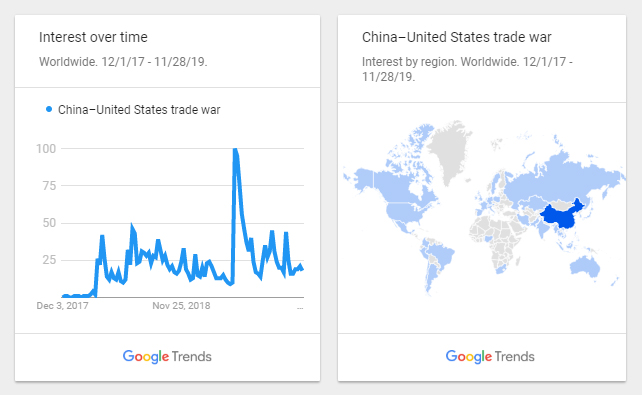

**What can we say?**
> * The interest over time started growing in 2018 and is still high in 2019.
* The interest had the highest peak in may 2019.
* China is the region with the highest number of searches.

In order to understand the importance of this conflict, let's see the global 2019 Gross Domestic Product (GDP) estimates by the International Monetary Fund (IMF) [4]:

In [ ]:
import pandas as pd
import plotly.offline as py
py.init_notebook_mode(connected=True)

gdp_2019 = pd.read_csv('../input/gdpimf/WEO_Data_Clean.csv', encoding='latin-1', sep='|')
worldmap = [dict(type = 'choropleth', locations = gdp_2019['Country'], locationmode = 'country names',
                 z = gdp_2019['2019'], colorscale = "Blues", reversescale = True, 
                 marker = dict(line = dict( width = 0.4)),
                 colorbar = dict(autotick = False, title = 'GDP<br>Billions USD'))]
layout = dict(title = 'Global GDP 2019 (IMF Estimates)', geo = dict(showframe = False, showcoastlines = False))
fig = dict(data=worldmap, layout=layout)
py.iplot(fig, validate=False)

**What can we say?**
> We see that the world’s two largest economies in 2019 are USA (1st) and China (2nd). Now we know a little bit about the China-United Stades Trade War, what can we say about the AI War? First of all, maybe the right term would be "AI Race". Because many people, companies and countries are racing to achieve an advantage in Artificial Intelligence (AI) because it is a foundational technology that can boost competitiveness, increase productivity, improve national security, and help to solve societal challenges. For China and United Stades, it can also help to win the Trade War. Let's see what the 2019 Kaggle Survey can tell us.

## Table of Contents

> * [1 - Number of Respondents](#1)
* [1.1 - Comparing USA and China](#1_1)
* [1.2 - Comparing with the Top 10](#1_2)
* [1.3 - Comparing with the Rest of the World](#1_3)
* [1.4 - Evolution since 2017](#1_4)
* [2 - Gender](#2)
* [3 - Age](#3)
* [3.1 - Age + Gender](#3_1)
* [4 - Education](#4)
* [4.1 - Formal Education](#4_1)
* [4.2 - Platform](#4_2)
* [5 - Top 10 Roles](#5)
* [6 - Company Size](#6)
* [7 - Machine Learning into Business](#7)
* [8 - Top 10 Salary](#8)
* [9 - Investment](#9)
* [10 - Experience](#10)
* [10.1 - Experience in Writing Code to Analyze Data](#10_1)
* [10.2 - Experience in Machine Learning Methods](#10_2)
* [11 - Toolkit](#11)
* [11.1 - Hardware](#11_1)
* [11.2 - TPU (Tensor Processing Unit)](#11_2)
* [11.3 - Programming Language](#11_3)
* [11.4 - Integrated Development Environments (IDE)](#11_4)
* [11.5 - Database](#11_5)
* [11.6 - Cloud](#11_6)
* [12 - Conclusion](#12)
* [13 - References](#13)

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
        
# Import 2019 Dataset
df_2019 = pd.read_csv('../input/kaggle-survey-2019/multiple_choice_responses.csv', low_memory=False)
df_2019.columns = df_2019.iloc[0]
df_2019.drop([0], inplace=True)

# Import 2018 Dataset
df_2018 = pd.read_csv('../input/kaggle-survey-2018/multipleChoiceResponses.csv', low_memory=False)
df_2018.columns = df_2018.iloc[0]
df_2018=df_2018.drop([0])

# Import 2017 Dataset
df_2017=pd.read_csv('../input/kaggle-survey-2017/multipleChoiceResponses.csv',encoding='ISO-8859-1', low_memory=False)

# Helper Variables
col_country = 'In which country do you currently reside?'
df_2019_cu = df_2019[(df_2019[col_country] == 'United States of America') | (df_2019[col_country] == 'China')]
df_2019_china = df_2019[df_2019[col_country] == 'China']
df_2019_usa = df_2019[df_2019[col_country] == 'United States of America']

# Helper Functions
def create_pie(col, explode_usa='', explode_china='', limit=1000):
    """
    Function designed to create pie plots comparing China and USA.
    col = Column of the dataframe. Type: str.
    explode_usa = Tuple with values to explode in the USA's pie plot. Type: tuple.
    explode_china = Tuple with values to explode in the China's pie plot. Type: tuple.
    limit = The top values to show. Type: int.
    """
    labels_usa = df_2019_usa[col].value_counts()[:limit].index
    sizes_usa = df_2019_usa[col].value_counts()[:limit].values
    
    labels_china = df_2019_china[col].value_counts()[:limit].index
    sizes_china = df_2019_china[col].value_counts()[:limit].values
    
    fig = plt.figure(figsize=(12,7))

    ax1 = fig.add_axes([0, 0, 1, 1], aspect=1)
    if explode_usa != '':
        ax1.pie(sizes_usa, explode=explode_usa, labels=labels_usa, autopct='%1.1f%%', startangle=45)
    else:
        ax1.pie(sizes_usa, labels=labels_usa, autopct='%1.1f%%', startangle=45)
    ax2 = fig.add_axes([0.7, 0, 1, 1], aspect=1)
    if explode_china != '':
        ax2.pie(sizes_china, explode=explode_china, labels=labels_china, autopct='%1.1f%%', startangle=45)
    else:
        ax2.pie(sizes_china, labels=labels_china, autopct='%1.1f%%', startangle=45)
    ax1.set_title('USA')
    ax2.set_title('China')
    plt.show()

def create_countplot(col, x_label, text_wrap=1000):
    """
    Function designed to create countplots.
    col = Column of the dataframe. Type: str.
    x_label = Label of the X axis. Type: str.
    text_wrap = Maximum number of letters of the words. Type: int.
    """
    plt.figure(figsize=(14,6))
    ax = sns.countplot(x=col, data=df_2019_cu, palette='rainbow', hue=col_country,
                      order=np.sort(df_2019_cu[col].unique()[~pd.isnull(df_2019_cu[col].unique())]))
    ax.set_xlabel(x_label)
    ax.legend(loc=1)
    _, labels = plt.xticks()
    x_axis=range(len(labels))
    plt.xticks(x_axis, [textwrap.fill(label.get_text(), text_wrap) for label in labels], rotation = 0, horizontalalignment="center")

    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+5), ha='center')
    plt.show()

def create_barplot(col_start, col_end, x_label, text_warp=1000):
    """
    Function designed to create countplots.
    col_start = Start column index of the dataframe. Type: int.
    col_end = End column index of the dataframe. Type: int.
    x_label = Label of the X axis. Type: str.
    text_wrap = Maximum number of letters of the words. Type: int.
    """
    names = []
    values = []
    countries = []
    for col_index in range (col_start, col_end):
        try:
            names.append(df_2019_usa.iloc[:,col_index].value_counts().index[0])
            values.append(df_2019_usa.iloc[:,col_index].value_counts().values[0])
            countries.append('United Stades')
        except:
            pass
        try:
            names.append(df_2019_china.iloc[:,col_index].value_counts().index[0])
            values.append(df_2019_china.iloc[:,col_index].value_counts().values[0])
            countries.append('China')
        except:
            pass
    temp_df = pd.DataFrame()
    temp_df['Names'] = names
    temp_df['Values'] = values
    temp_df['In which country do you currently reside?'] = countries

    plt.figure(figsize=(14,6))
    ax = sns.barplot(x='Names', y='Values', data=temp_df, palette='rainbow', hue=col_country,
                      order=np.sort(temp_df['Names'].unique()[~pd.isnull(temp_df['Names'].unique())]))
    ax.set_xlabel(x_label)
    ax.legend(loc=1)
    _, labels = plt.xticks()
    x_axis=range(len(labels))
    plt.xticks(x_axis, [textwrap.fill(label.get_text(), text_warp) for label in labels], rotation = 0, horizontalalignment="center")
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+8), ha='center')
    plt.show()

<a id="1"></a>
## 1 - Number of Respondents
***
On this section we compare the number of Kaggle survey respondents from USA and China and also with other countries.

<a id="1_1"></a>
## 1.1 - Comparing USA and China
***
Here we plot the number of respondents from USA and China.

In [ ]:
plt.figure(figsize=(9,5))
ax = sns.countplot(x=col_country, data=df_2019_cu, palette='rainbow')
ax.set_title('Country')
ax.set_ylabel('Respondents')
ax.set_xlabel('')
for p in ax.patches:
        ax.annotate(str(p.get_height()) + ' (' + '{:.1f}%'.format(p.get_height()/len(df_2019_cu)*100) + ')', (p.get_x()+p.get_width()/2, p.get_height()-250), ha='center')
plt.show()

**What can we say?**
> This plot shows that the participation of Americans were much bigger. There are some possible explanations:
> 
> 1. There are more Americans in Kaggle than Chineses.
> 2. The survey language was English and some Chineses don't feel confortable with this language.
> 3. Americans are just more willing to collaborate with surveys.
> 
> Or maybe a combination of the above assumptions could be true.

<a id="1_2"></a>
## 1.2 - Comparing with the Top 10
***
Now let's see the number respondents of Top 10 countries.

In [ ]:
countries_2019 = df_2019[col_country]

labels = countries_2019.value_counts()[:10].index
sizes = countries_2019.value_counts()[:10].values
explode = (0, 0.07, 0, 0, 0, 0, 0.07, 0, 0, 0)

fig1, ax1 = plt.subplots(figsize=(11,8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
ax1.set_title('Top 10 Respondents', y=1.1)
plt.show()

**What can we say?**
> * We see that USA represents 23.8% of top 10 and China is only 4.4%.
> * India is the first, USA the second and China is only the sixth.
> * If a country or territory received less than 50 respondents, it is grouped into “Other”.

<a id="1_3"></a>
## 1.3 - Comparing with the Rest of the World
***
Here we can see the proportion of respondents from USA and China compared with the rest of the world.

In [ ]:
print(f'{countries_2019.value_counts().values[1]/len(countries_2019)*100:.2f}% of the respondents are from USA')
print(f'{countries_2019.value_counts().values[6]/len(countries_2019)*100:.2f}% of the respondents are from China')

<a id="1_4"></a>
## 1.4 - Evolution since 2017
***
Let's see the evolution of the number of respondents since the 2017 Kaggle survey.

In [ ]:
replace_dict = {"United States of America":"United States", "People 's Republic of China":"China"}
df_2017['Country'].replace(replace_dict,inplace=True)
df_2018['In which country do you currently reside?'].replace(replace_dict,inplace=True)

respondents = []
respondents.append(len(df_2017[df_2017['Country'] == 'United States']))
respondents.append(len(df_2017[df_2017['Country'] == 'China']))
respondents.append(len(df_2018[df_2018[col_country] == 'United States']))
respondents.append(len(df_2018[df_2018[col_country] == 'China']))
respondents.append(len(df_2019_usa))
respondents.append(len(df_2019_china))

temp_df = pd.DataFrame()
temp_df['Year'] = [2017, 2017, 2018, 2018, 2019, 2019]
temp_df['Respondents'] = respondents
temp_df['Country'] = ['United States', 'China', 'United States', 'China', 'United States', 'China']

plt.figure(figsize=(9,5))
ax = sns.barplot(x='Year', y='Respondents', data=temp_df, palette='rainbow', hue='Country',
                  order=np.sort(temp_df['Year'].unique()))
ax.set_xlabel('Year')
ax.legend(loc=1)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+40), ha='center')
plt.show()

**What can we say?**
> * We see that the number of respondents in USA increased from 2017 to 2018 but decreased to its minimum in 2019.
> * In China there is a similar trend but in 2019 the number of respondents is still bigger than in 2017.
> * Let's see this trend with the following linear regression plot.

In [ ]:
ax = sns.lmplot(x='Year', y='Respondents', data=temp_df, col='Country', size=5, aspect=1)

<a id="2"></a>
## 2 - Gender
***
Let's analyze the gender of the respondents.

In [ ]:
create_pie('What is your gender? - Selected Choice',(0, 0, 0.2, 0.9), (0, 0, 0))

**What can we say?**
> * The first thing we notice is that men were the majority of the respondents, but in the USA the presence of women was higher than in China: 20.2% vs 14.6%.

<a id="3"></a>
## 3 - Age
***
What about the age of the respondents?

In [ ]:
col = 'What is your age (# years)?'
create_countplot(col, 'Age')

**What can we say?**
> * The most frequent ages in USA are 25-29 and 30-34.
> * The most frequent ages in China are 22-24 and 25-29.
> * In China we see an absolute predominance of young people (under 40 years old). In the United States, most are young too, but there is a better distribution among all ages. Let's see it in the following plot.

In [ ]:
below_40 = ['18-21','22-24','25-29','30-34','35-39']
labels = ['Below 40','Above 40']
sizes_usa = [len(df_2019_usa[df_2019_usa[col].isin(below_40)]), len(df_2019_usa[df_2019_usa[col].isin(below_40) == False])]
sizes_china = [len(df_2019_china[df_2019_china[col].isin(below_40)]), len(df_2019_china[df_2019_china[col].isin(below_40) == False])]

fig = plt.figure(figsize=(10,6))

ax1 = fig.add_axes([0, 0, 1, 1], aspect=1)
ax1.pie(sizes_usa, labels=labels, autopct='%1.1f%%', startangle=45)
ax2 = fig.add_axes([0.7, 0, 1, 1], aspect=1)
ax2.pie(sizes_china, labels=labels, autopct='%1.1f%%', startangle=45)
ax1.set_title('USA')
ax2.set_title('China')
plt.show()

<a id="3_1"></a>
## 3.1 - Age + Gender
***
Let's plot age and gender information on the same chart for each country.

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(14, 6))
sns.countplot(x=col, data=df_2019_usa, palette='rainbow', hue='What is your gender? - Selected Choice',
                hue_order = ['Male', 'Female', 'Prefer not to say', 'Prefer to self-describe'],
                order=np.sort(df_2019_usa[col].unique()), ax=ax[0])
sns.countplot(x=col, data=df_2019_china, palette='rainbow', hue='What is your gender? - Selected Choice',
                hue_order = ['Male', 'Female', 'Prefer not to say'],
                order=np.sort(df_2019_china[col].unique()), ax=ax[1])
ax[0].set_title('USA')
ax[0].legend(loc=1)
ax[0].set_xlabel('Age')
ax[1].set_title('China')
ax[1].legend(loc=1)
ax[1].set_xlabel('Age')
for p in ax[0].patches:
    ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+3), ha='center')
for p in ax[1].patches:
    ax[1].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+3), ha='center')
fig.show()

**What can we say?**
> * The most frequent ages in USA are the same for male and female: 25-29 and 30-34.
> * The most frequent ages in China are the same for male and female: 22-24 and 25-29.

<a id="4"></a>
## 4 - Education
***
On this section we will reveal the information about education. Is there any differences between USA and China?

<a id="4_1"></a>
## 4.1 - Formal Education
***
What is the highest level of formal education that respondents have attained or plan to attain within the next 2 years?

In [ ]:
create_countplot('What is the highest level of formal education that you have attained or plan to attain within the next 2 years?', 'Education', text_wrap=12)

**What can we say?**
> * The same pattern repeats in USA and China: Master's degree is the most common level of formal education followed by Bachelor's degree and Doctoral degree

<a id="4_2"></a>
## 4.2 - Platform
***
Which platform do the respondents use to learn?

In [ ]:
create_barplot(35, 47, 'Platform', text_warp=10)

**What can we say?**
> * Again the same pattern repeats in USA and China: The favorite platforms are Coursera, University Courses and Kaggle Courses.
> * Some famous platforms in USA like DataCamp and Udemy are not much used by the Chineses respondents.

<a id="5"></a>
## 5 - Top 10 Roles
***
Let's see now a comparison about the main roles.

In [ ]:
create_pie('Select the title most similar to your current role (or most recent title if retired): - Selected Choice', limit=10)

**What can we say?**
> * Here we can see some huge differences between USA and China. Data Scientist is the main role in USA, while in China it's Student. This is consistent with the fact that respondents from China are younger as we had seen before.

<a id="6"></a>
## 6 - Company Size
***
What is the size of the company of the respondents?

In [ ]:
create_pie('What is the size of the company where you are employed?')

**What can we say?**
> * In both countries there is a good distribution among all company sizes, it shows that AI is being implemented from small to big companies.

<a id="7"></a>
## 7 - Machine Learning into Business
***
Let's see the answers for the following question: Does your current employer incorporate machine learning methods into their business?

In [ ]:
create_countplot('Does your current employer incorporate machine learning methods into their business?', 'Machine Learning into Business', text_wrap=20)

**What can we say?**
> * In United Stades the majority of employers has been using Machine Learning models, but in China the majority is still exploring Machine Learning methods or has been using for less than 2 years. So we can see that in the United States the use of ML methods is more consolidated.

<a id="8"></a>
## 8 - Top 10 Salary
***
Let's compare information about salary ($USD) in both countries.

In [ ]:
create_pie('What is your current yearly compensation (approximate $USD)?', limit=10)

**What can we say?**
> * There is a big difference here. The incomes in United Stades are much bigger than in China. But as we are comparing two different countries, we have to remember a concept called Purchasing Power Parity (PPP). PPP adjusts the price of an item (or the salary), given two countries' exchange rates, in order for the exchange to match each currency’s purchasing power and compare countries' income levels and the cost of living.

<a id="9"></a>
## 9 - Investment
***
What did respondents say about investment on machine learning and/or cloud computing at work in the past 5 years?

In [ ]:
create_pie('Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?')

**What can we say?**
> * The United States is the country of extremes. A significant portion spends nothing and another large portion spends over $100,000. On the other hand, in China a larger percentage of the respondents spends money, but the amounts are smaller.

<a id="10"></a>
## 10 - Experience
***
On this section we can see the experience in writing code to analyze data and also the experience in Machine Learning methods.

<a id="10_1"></a>
## 10.1 - Experience in Writing Code to Analyze Data
***
Let's see the experience in writing code to analyze data (at work or at school).

In [ ]:
col = 'How long have you been writing code to analyze data (at work or at school)?'
create_pie(col, explode_china=(0,0,0,0,0,0,0.3))

**What can we say?**
> * Respondents from USA have a bigger experience in writing code to analyze data.
> * Let's plot below the same data but with a 2 years threshold.

In [ ]:
below_2 = ['I have never written code','< 1 years','1-2 years']
labels = ['Below 2 years','Above 2 years']
sizes_usa = [len(df_2019_usa[df_2019_usa[col].isin(below_2)]), len(df_2019_usa[df_2019_usa[col].isin(below_2) == False])]
sizes_china = [len(df_2019_china[df_2019_china[col].isin(below_2)]), len(df_2019_china[df_2019_china[col].isin(below_2) == False])]

fig = plt.figure(figsize=(10,6))

ax1 = fig.add_axes([0, 0, 1, 1], aspect=1)
ax1.pie(sizes_usa, labels=labels, autopct='%1.1f%%', startangle=45)
ax2 = fig.add_axes([0.7, 0, 1, 1], aspect=1)
ax2.pie(sizes_china, labels=labels, autopct='%1.1f%%', startangle=45)
ax1.set_title('USA')
ax2.set_title('China')
plt.show()

<a id="10_2"></a>
## 10.2 - Experience in Machine Learning Methods
***
For how many years have the respondents used machine learning methods?

In [ ]:
create_pie('For how many years have you used machine learning methods?')

**What can we say?**
> * We can see a similar pattern from the last section. Respondents from USA have a bigger experience with machine learning methods.
> * Let's plot below the same data but with a 2 year threshold.

In [ ]:
below_2 = ['< 1 years','1-2 years']
labels = ['Below 2 years','Above 2 years']
sizes_usa = [len(df_2019_usa[df_2019_usa[col].isin(below_2)]), len(df_2019_usa[df_2019_usa[col].isin(below_2) == False])]
sizes_china = [len(df_2019_china[df_2019_china[col].isin(below_2)]), len(df_2019_china[df_2019_china[col].isin(below_2) == False])]

fig = plt.figure(figsize=(10,6))

ax1 = fig.add_axes([0, 0, 1, 1], aspect=1)
ax1.pie(sizes_usa, labels=labels, autopct='%1.1f%%', startangle=45)
ax2 = fig.add_axes([0.7, 0, 1, 1], aspect=1)
ax2.pie(sizes_china, labels=labels, autopct='%1.1f%%', startangle=45)
ax1.set_title('USA')
ax2.set_title('China')
plt.show()

<a id="11"></a>
## 11 - Toolkit
***
On this section we compare hardware and software used on a Regular Basis on both countries.

<a id="11_1"></a>
## 11.1 - Hardware
***
What can we tell about the hardware used on a regular basis?

In [ ]:
create_barplot(110, 115, 'Hardware Used on a Regular Basis')

**What can we say?**
> * CPU and GPU are the most used on USA and China.
* Also noteworthy is the number of people in the United States who answered "None/I do not know".

<a id="11_2"></a>
## 11.2 - TPU (Tensor Processing Unit)
***
Here the question is: Have you ever used a TPU (Tensor Processing Unit)?

In [ ]:
create_pie('Have you ever used a TPU (tensor processing unit)?', (0,0,0,0,0.3), (0,0,0,0,0.3))

**What can we say?**
> * TPU is still a recent technology, so it's normal that it hasn't been widely adopted yet.

<a id="11_3"></a>
## 11.3 - Programming Language
***
What are the programming languages used on a regular basis?

In [ ]:
create_barplot(82, 94, 'Programming Language Used on a Regular Basis')

**What can we say?**
> * Python is the most popular programming language followed by SQL in both countries.
* The difference occurs in the third place, in the United States is R and in China is C ++.
* It is striking that in China R is very little used.

<a id="11_4"></a>
## 11.4 - Integrated Development Environments (IDE)
***
Here we see the IDEs used on a regular basis.

In [ ]:
create_barplot(56, 68, 'IDE Used on a Regular Basis', 12)

**What can we say?**
> * Jupyter is the most popular IDE in both countries.
* In China RStudio is not popular, which makes sense because, as we have seen above, R language is not widely used in China.

<a id="11_5"></a>
## 11.5 - Database
***
What about the databases used on a regular basis?

In [ ]:
create_barplot(233, 245, 'Database Used on a Regular Basis', 11)

**What can we say?**
> * Top 3 database in USA: MySQL, PostgresSQL and Microsoft SQL Server.
* Top 3 database in China: MySQL, PostgresSQL and SQLite.
* Here the winner is neither USA nor China, it's MySQL!

<a id="11_6"></a>
## 11.6 - Cloud
***
What about the cloud used on a regular basis?

In [ ]:
create_barplot(168, 180, 'Cloud Used on a Regular Basis', 11)

**What can we say?**
> * For respondents using a cloud service, the most commonly used in the United States is AWS folowed by GCP and Azure.
* In China Alibaba Cloud is the first, which makes sense because Alibaba is a Chinese company, GCP is the second and AWS in third.

<a id="12"></a>
## 12 - Conclusion
***
So who is winning the AI War according to this survey? In order to determine who is winning the race, first we have to determine the parameters to assess. Let's choose the following parameters:
* Number of Respondents
* Number of Respondents Growth
* Diversity (Genre and Age)
* Education
* Adoption among Company Sizes
* Adoption into Business
* Salary
* Investment
* Experience
* Hardware

Let's create a table comparing what we've seen in order to calculate the final score.

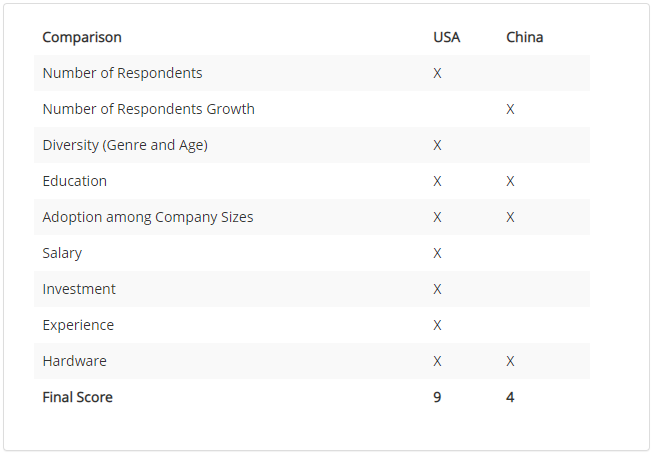

According to this survey, we interpret that USA is currently wining the AI Race (USA 9 x 4 China). Of course one can interpret data differently and get a different final score. Besides, due to the not so big participation of Chineses on the survey, we know we need more data in order to have more accurate conclusions.

> "If we capitulate to superstition or greed or stupidity we could plunge our world into a time of darkness deeper than the time between the collapse of classical civilisation and the Italian Renaissance. But we are also capable of using our compassion and our intelligence, our technology and our wealth to make an abundant and meaningful life for every inhabitant of this planet." - Carl Sagan from Cosmos

<a id="13"></a>
## 13 - References
***
1. [China-United States Trade War - Wikipedia](https://en.wikipedia.org/wiki/China%E2%80%93United_States_trade_war)
2. [The New York Times](https://www.nytimes.com/2018/07/05/business/china-us-trade-war-trump-tariffs.html)
3. [Google Trends](https://trends.google.com/trends/explore?date=2017-12-01%202019-11-28&q=%2Fg%2F11f54sgftt)
4. [GDP - IMF Estimates](https://www.imf.org/external/pubs/ft/weo/2019/02/weodata/weorept.aspx?pr.x=57&pr.y=17&sy=2019&ey=2019&scsm=1&ssd=1&sort=country&ds=.&br=1&c=512%2C668%2C914%2C672%2C612%2C946%2C614%2C137%2C311%2C546%2C213%2C674%2C911%2C676%2C314%2C548%2C193%2C556%2C122%2C678%2C912%2C181%2C313%2C867%2C419%2C682%2C513%2C684%2C316%2C273%2C913%2C868%2C124%2C921%2C339%2C948%2C638%2C943%2C514%2C686%2C218%2C688%2C963%2C518%2C616%2C728%2C223%2C836%2C516%2C558%2C918%2C138%2C748%2C196%2C618%2C278%2C624%2C692%2C522%2C694%2C622%2C962%2C156%2C142%2C626%2C449%2C628%2C564%2C228%2C565%2C924%2C283%2C233%2C853%2C632%2C288%2C636%2C293%2C634%2C566%2C238%2C964%2C662%2C182%2C960%2C359%2C423%2C453%2C935%2C968%2C128%2C922%2C611%2C714%2C321%2C862%2C243%2C135%2C248%2C716%2C469%2C456%2C253%2C722%2C642%2C942%2C643%2C718%2C939%2C724%2C734%2C576%2C644%2C936%2C819%2C961%2C172%2C813%2C132%2C726%2C646%2C199%2C648%2C733%2C915%2C184%2C134%2C524%2C652%2C361%2C174%2C362%2C328%2C364%2C258%2C732%2C656%2C366%2C654%2C144%2C336%2C146%2C263%2C463%2C268%2C528%2C532%2C923%2C944%2C738%2C176%2C578%2C534%2C537%2C536%2C742%2C429%2C866%2C433%2C369%2C178%2C744%2C436%2C186%2C136%2C925%2C343%2C869%2C158%2C746%2C439%2C926%2C916%2C466%2C664%2C112%2C826%2C111%2C542%2C298%2C967%2C927%2C443%2C846%2C917%2C299%2C544%2C582%2C941%2C474%2C446%2C754%2C666%2C698&s=NGDPD&grp=0&a=)